# Analysis:

In [1]:
from itertools import islice
from matplotlib import cm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [2]:
df = pd.read_csv('../data/use_for_analysis.csv')

In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.columns

Index(['date', 'day', 'weekday', 'start_time', 'game_time', 'color', 'elo',
       'opp_elo', 'diff', 'result', 'won_by', 'num_moves', 'castled',
       'opp_castled', 'castled_on', 'opp_castled_on', 'time_used',
       'opp_time_used'],
      dtype='object')

In [4]:
len(df)

2243

In [5]:
df['time_used'] = round((df['time_used']/df['game_time'])*100)
df['opp_time_used'] = round((df['opp_time_used']/df['game_time'])*100)
df = df[df['time_used'] <= 100]
df = df[df['opp_time_used'] <= 100]

In [6]:
len(df)

2199

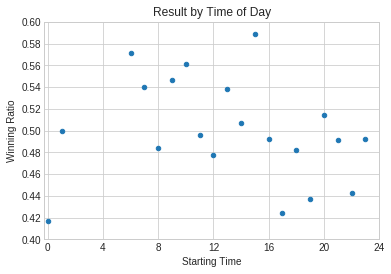

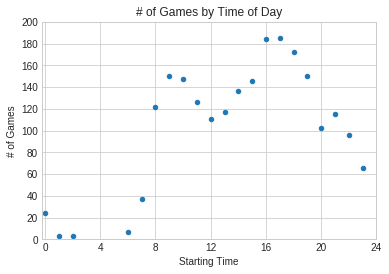

In [75]:
df_mean_by_start_time = df.groupby('start_time').mean()

df_mean_by_start_time.reset_index(inplace=True)
df_mean_by_start_time.plot.scatter(x='start_time', y='result',
                                   title='Result by Time of Day', legend=False)
plt.ylim(0.4, 0.600)
plt.yticks(ticks=np.arange(0.4, 0.601, step=0.02))
plt.xlim(-.25, 24)
plt.xticks(ticks=np.arange(0, 25, step=4))
plt.ylabel('Winning Ratio')
plt.xlabel('Starting Time')
df_count_by_start_time = df.groupby('start_time').count()
df_count_by_start_time.reset_index(inplace=True)
df_count_by_start_time.plot.scatter(x='start_time', y='result',
                                    title='# of Games by Time of Day',
                                    legend=False)
plt.xlim(-.25, 24)
plt.xticks(ticks=np.arange(0, 25, step=4))
plt.ylim(0, 200)
plt.yticks(ticks=np.arange(0, 201, step=20))
plt.ylabel('# of Games')
plt.xlabel('Starting Time')
plt.show()

### My chances of winning are above 55% at:
6 AM, 10 AM, and 3 PM

### My chances of winning are below 45% at:
12 AM, 2 AM (0-3), 5 PM, 7 PM, and 10 PM

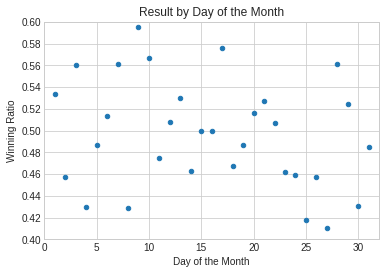

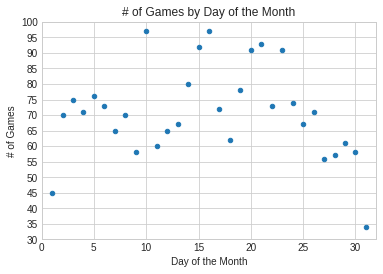

In [54]:
df_mean_by_day = df.groupby('day').mean()
df_mean_by_day.reset_index(inplace=True)
df_mean_by_day.plot.scatter(x='day', y='result', legend=False,
                            title='Result by Day of the Month')
plt.xlim(0, 32)
plt.xticks(ticks=np.arange(0, 32, step=5))
plt.ylim(0.4, 0.6)
plt.yticks(ticks=np.arange(0.4, 0.61, step=0.02))
plt.ylabel('Winning Ratio')
plt.xlabel('Day of the Month')
df_count_by_day = df.groupby('day').count()
df_count_by_day.reset_index(inplace=True)
df_count_by_day.plot.scatter(x='day', y='result', legend=False,
                             title='# of Games by Day of the Month')
plt.ylabel('# of Games')
plt.xlabel('Day of the Month')
plt.xlim(0, 32)
plt.xticks(ticks=np.arange(0, 32, step=5))
plt.ylim(30, 100)
plt.yticks(ticks=np.arange(30, 101, step=5))
plt.show()

### My chances of winning are above 55% on:
3rd, 7th, 9th, 10th, 17th, and the 28th of the month

### My chances of winning are below 45% on:
4th, 8th, 25th, 27th, and the 30th of the month

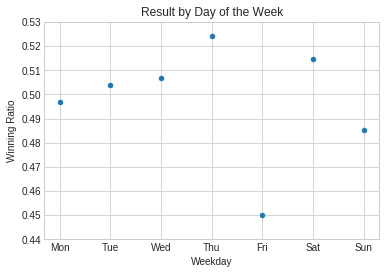

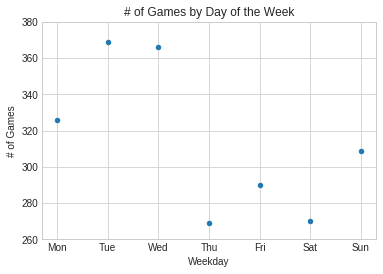

In [84]:
df_mean_by_weekday = df.groupby('weekday').mean()
df_mean_by_weekday.reset_index(inplace=True)
df_mean_by_weekday.plot.scatter(x='weekday', y='result', marker='o',
                        title='Result by Day of the Week',
                        legend=False)
plt.ylim(0.44, 0.53)
plt.yticks(ticks=np.arange(0.44, 0.531, step=0.01))
plt.xticks(ticks=np.arange(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel('Winning Ratio')
plt.xlabel('Weekday')
df_count_by_weekday = df.groupby('weekday').count()
df_count_by_weekday.reset_index(inplace=True)
df_count_by_weekday.plot.scatter(x='weekday', y='result', marker='o',
                         title='# of Games by Day of the Week',
                         legend=False)
plt.xticks(ticks=np.arange(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylim(260, 380)
plt.yticks(ticks=np.arange(260, 400, step=20))
plt.ylabel('# of Games')
plt.xlabel('Weekday')
plt.show()

### The best day to play is:
Thursday

### The worst day to play is:
Friday

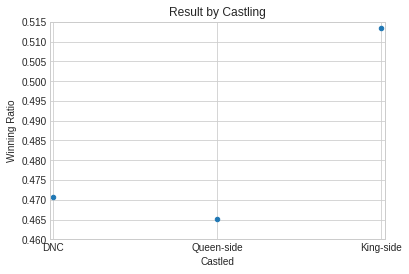

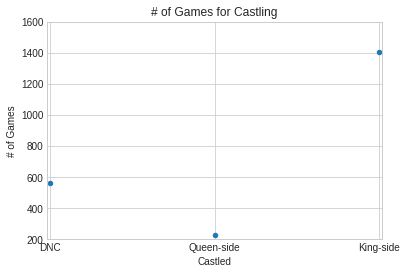

In [106]:
df_mean_by_castled = df.groupby('castled').mean()
df_mean_by_castled.reset_index(inplace=True)
df_mean_by_castled.plot.scatter(x='castled', y='result',
                        title='Result by Castling', legend=False)
plt.ylim(0.46, 0.515)
plt.yticks(ticks=np.arange(0.46, 0.516, step=0.005))
plt.xlim(-1.02, 1.02)
plt.xticks(ticks=[-1,0,1], labels=['DNC', 'Queen-side', 'King-side'])
plt.ylabel('Winning Ratio')
plt.xlabel('Castled')
df_count_by_castled = df.groupby('castled').count()
df_count_by_castled.reset_index(inplace=True)
df_count_by_castled.plot.scatter(x='castled', y='result', marker='o',
                         title='# of Games for Castling', legend=False)
plt.ylim(200, 1600)
plt.yticks(ticks=np.arange(200, 1700, step=200))
plt.xlim(-1.02, 1.02)
plt.xticks(ticks=[-1,0,1], labels=['DNC', 'Queen-side', 'King-side'])
plt.ylabel('# of Games')
plt.xlabel('Castled')
plt.show()

### My chances of winning increase by 5% if I castle King-side v. if I castle Queen-side

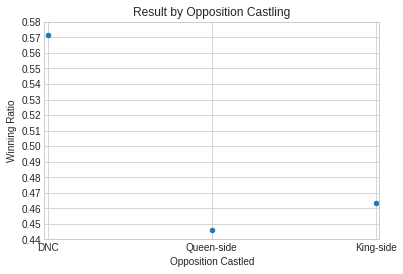

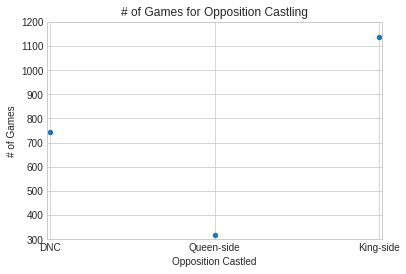

In [105]:
df_mean_by_opp_castled = df.groupby('opp_castled').mean()
df_mean_by_opp_castled.reset_index(inplace=True)
df_mean_by_opp_castled.plot.scatter(x='opp_castled', y='result', marker='o',
                            title='Result by Opposition Castling', legend=False)
plt.ylim(0.44, 0.58)
plt.yticks(ticks=np.arange(0.44, 0.581, step=0.01))
plt.xlim(-1.02, 1.02)
plt.xticks(ticks=[-1,0,1], labels=['DNC', 'Queen-side', 'King-side'])
plt.ylabel('Winning Ratio')
plt.xlabel('Opposition Castled')
df_count_by_opp_castled = df.groupby('opp_castled').count()
df_count_by_opp_castled.reset_index(inplace=True)
df_count_by_opp_castled.plot.scatter(x='opp_castled', y='result', marker='o',
                             title='# of Games for Opposition Castling', legend=False)
plt.ylim(300, 1200)
plt.yticks(ticks=np.arange(300, 1300, step=100))
plt.xlim(-1.02, 1.02)
plt.xticks(ticks=[-1,0,1], labels=['DNC', 'Queen-side', 'King-side'])
plt.ylabel('# of Games')
plt.xlabel('Opposition Castled')
plt.show()

### My chances of winning increase by 10%+ if opponent doesn't castle!!

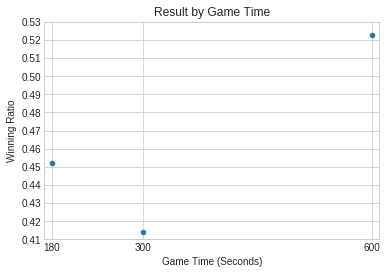

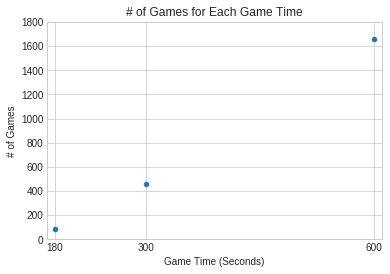

In [111]:
df_mean_by_game_time = df.groupby('game_time').mean()
df_mean_by_game_time.reset_index(inplace=True)
df_mean_by_game_time.plot.scatter(x='game_time', y='result', marker='o',
                          title='Result by Game Time', legend=False)
plt.ylim(0.41, 0.53)
plt.yticks(ticks=np.arange(0.41, 0.531, step=0.01))
plt.ylabel('Winning Ratio')

plt.xlim(170, 610)
plt.xticks(ticks=[180, 300, 600], labels=[180, 300, 600])
plt.xlabel('Game Time (Seconds)')

df_count_by_game_time = df.groupby('game_time').count()
df_count_by_game_time.reset_index(inplace=True)
df_count_by_game_time.plot.scatter(x='game_time', y='result', marker='o',
                           title='# of Games for Each Game Time', legend=False)

plt.ylabel('# of Games')
plt.ylim(0, 1700)
plt.yticks(ticks=np.arange(0, 1801, step=200))

plt.xlabel('Game Time (Seconds)')
plt.xlim(170, 610)
plt.xticks(ticks=[180, 300, 600], labels=[180, 300, 600])

plt.show()

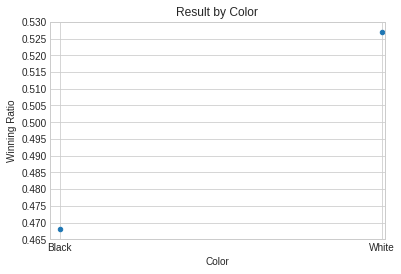

In [123]:
df_mean_by_color = df.groupby('color').mean()
df_mean_by_color.reset_index(inplace=True)
df_mean_by_color.plot.scatter(x='color', y='result', marker='o',
                      title='Result by Color', legend=False)

plt.ylabel('Winning Ratio')
plt.ylim(0.465, 0.53)
plt.yticks(ticks=np.arange(0.465, 0.531, step=0.005))

plt.xlabel('Color')
plt.xlim(-.03, 1.01)
plt.xticks(ticks=[0, 1], labels=['Black', 'White'])

plt.show()

### My chances of winning are 6% higher if I play with white pieces

In [126]:
bin_opp_elo = [650, 1050, 1150, 1250, 1350, 1450, 1650, 1750, 1850]
bin_opp_elo.extend(list(range(660, 1041, 10)))
bin_opp_elo = sorted(bin_opp_elo)

In [127]:
bin_diff = [-500, -400, -300, -200, -100, 100, 200, 300, 400, 500, 600]
bin_diff.extend(list(range(-90, 91, 5)))
bin_diff = sorted(bin_diff)

In [128]:
df['bin_elo'] = pd.cut(x=df.elo, bins=list(
    range(650, 1051, 10)), labels=list(range(650, 1041, 10))).astype(int)
df['bin_opp_elo'] = pd.cut(
    x=df.opp_elo, bins=bin_opp_elo, labels=bin_opp_elo[:-1]).astype(float)
df['bin_diff'] = pd.cut(x=df['diff'], bins=bin_diff,
                        labels=bin_diff[:-1]).astype(float)
df['bin_num_moves'] = pd.cut(x=df.num_moves, bins=list(
    range(0, 151, 5)), labels=list(range(0, 146, 5))).astype(float)
df['bin_time_used'] = pd.cut(x=df.time_used, bins=list(
    range(0, 101, 5)), labels=list(range(0, 96, 5))).astype(float)
df['bin_opp_time_used'] = pd.cut(x=df.opp_time_used, bins=list(
    range(0, 101, 5)), labels=list(range(0, 96, 5))).astype(float)

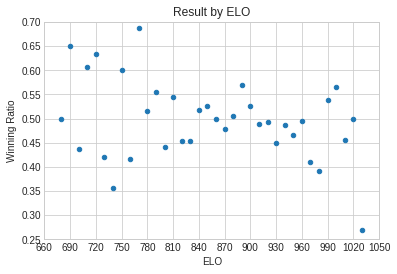

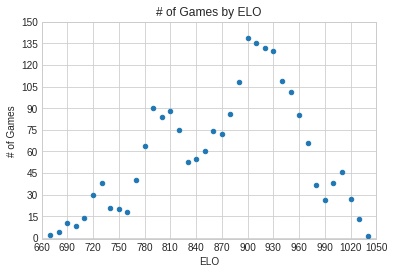

In [152]:
df_mean_by_elo = df.groupby('bin_elo').mean()
df_mean_by_elo.reset_index(inplace=True)
df_mean_by_elo.plot.scatter(x='bin_elo', y='result',
                            title='Result by ELO', legend=False)

plt.ylabel('Winning Ratio')
plt.ylim(0.25, 0.7)
plt.yticks(ticks=np.arange(0.25, 0.71, step=0.05))

plt.xlabel('ELO')
plt.xlim(660, 1050)
plt.xticks(ticks=np.arange(660, 1051, step=30))

df_count_by_elo = df.groupby('bin_elo').count()
df_count_by_elo.reset_index(inplace=True)
df_count_by_elo.plot.scatter(x='bin_elo', y='result',
                             title='# of Games by ELO',
                             legend=False)
plt.ylabel('# of Games')
plt.ylim(-1, 150)
plt.yticks(ticks=np.arange(0, 151, step=15))

plt.xlabel('ELO')
plt.xlim(660, 1050)
plt.xticks(ticks=np.arange(660, 1051, step=30))

plt.show()

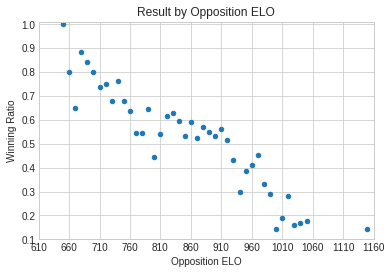

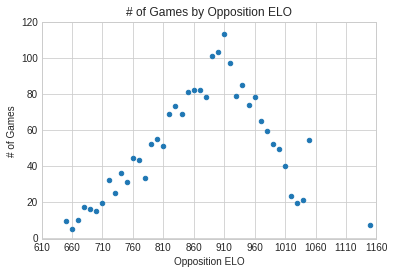

In [171]:
df_mean_by_opp_elo = df.groupby('bin_opp_elo').mean()
df_mean_by_opp_elo.reset_index(inplace=True)
df_mean_by_opp_elo.plot.scatter(x='bin_opp_elo', y='result',
                                title='Result by Opposition ELO',
                                legend=False)
plt.ylabel('Winning Ratio')
plt.ylim(0.1, 1.01)
plt.yticks(ticks=np.arange(0.1, 1.02, step=0.1))

plt.xlabel('Opposition ELO')
plt.xlim(610, 1160)
plt.xticks(ticks=np.arange(610, 1161, step=50))

df_count_by_opp_elo = df.groupby('bin_opp_elo').count()
df_count_by_opp_elo.reset_index(inplace=True)
df_count_by_opp_elo.plot.scatter(x='bin_opp_elo', y='result', legend=False,
                                 title='# of Games by Opposition ELO')
plt.ylabel('# of Games')
plt.ylim(-1, 120)
plt.yticks(ticks=np.arange(0, 121, step=20))

plt.xlabel('Opposition ELO')
plt.xlim(610, 1160)
plt.xticks(ticks=np.arange(610, 1161, step=50))
plt.show()

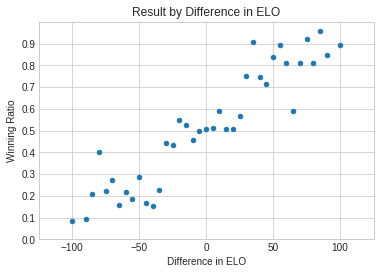

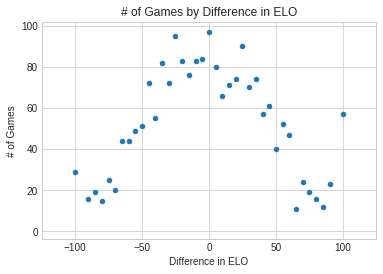

In [40]:
df_mean_by_diff = df.groupby('bin_diff').mean()
df_mean_by_diff.reset_index(inplace=True)
df_mean_by_diff.plot.scatter(x='bin_diff', y='result', legend=False,
                             title='Result by Difference in ELO')
plt.xlim((-125, 125))
plt.ylim((0,1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.ylabel('Winning Ratio')
plt.xlabel('Difference in ELO')
df_count_by_diff = df.groupby('bin_diff').count()
df_count_by_diff.reset_index(inplace=True)
df_count_by_diff.plot.scatter(x='bin_diff', y='result', legend=False,
                              title='# of Games by Difference in ELO')
plt.ylabel('# of Games')
plt.xlabel('Difference in ELO')
plt.xlim((-125, 125))
plt.show()

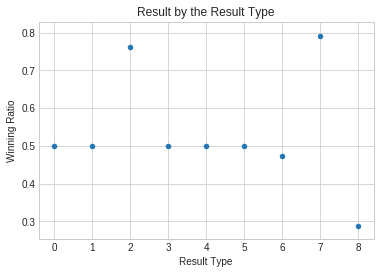

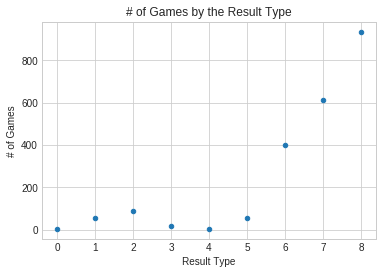

In [32]:
df_mean_by_won_by = df.groupby('won_by').mean()
df_mean_by_won_by.reset_index(inplace=True)
df_mean_by_won_by.plot.scatter(x='won_by', y='result',
                               title='Result by the Result Type')
plt.ylabel('Winning Ratio')
plt.xlabel('Result Type')
df_count_by_won_by = df.groupby('won_by').count()
df_count_by_won_by.reset_index(inplace=True)
df_count_by_won_by.plot.scatter(x='won_by', y='result', legend=False,
                                title='# of Games by the Result Type')
plt.ylabel('# of Games')
plt.xlabel('Result Type')
plt.show()

### I usually win by my opponent resigning or abandoning the game. Which is fairly typical once the other player knows the game is over

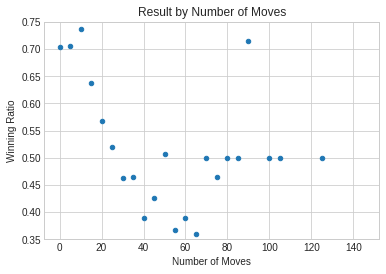

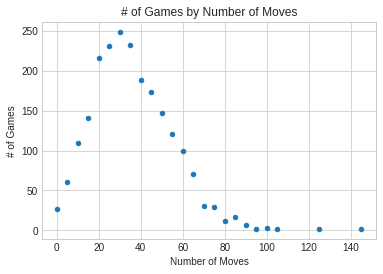

In [46]:
df_mean_by_num_moves = df.groupby('bin_num_moves').mean()
df_mean_by_num_moves.reset_index(inplace=True)
df_mean_by_num_moves.plot.scatter(x='bin_num_moves', y='result',
                                  title='Result by Number of Moves')
plt.ylim((.35, .75))
plt.ylabel('Winning Ratio')
plt.xlabel('Number of Moves')
df_count_by_num_moves = df.groupby('bin_num_moves').count()
df_count_by_num_moves.reset_index(inplace=True)
df_count_by_num_moves.plot.scatter(x='bin_num_moves', y='result', legend=False,
                                   title='# of Games by Number of Moves')
plt.ylabel('# of Games')
plt.xlabel('Number of Moves')
plt.show()

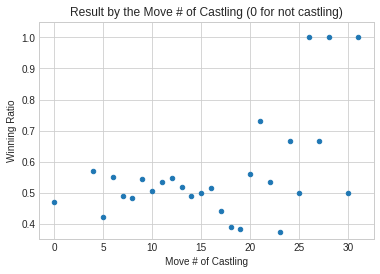

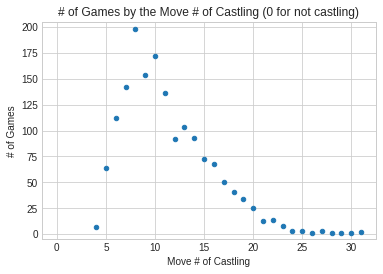

In [45]:
df_mean_by_castled_on = df.groupby('castled_on').mean()
df_mean_by_castled_on.reset_index(inplace=True)
df_mean_by_castled_on.plot.scatter(x='castled_on', y='result', legend=False,
                                   title='Result by the Move # of Castling (0 for not castling)')
plt.ylim((.35, 1.05))
plt.ylabel('Winning Ratio')
plt.xlabel('Move # of Castling')
df_count_by_castled_on = df.groupby('castled_on').count()
df_count_by_castled_on.reset_index(inplace=True)
df_count_by_castled_on.plot.scatter(x='castled_on', y='result', legend=False,
                                    title='# of Games by the Move # of Castling (0 for not castling)')
plt.ylim((-5, 205))
plt.ylabel('# of Games')
plt.xlabel('Move # of Castling')
plt.show()

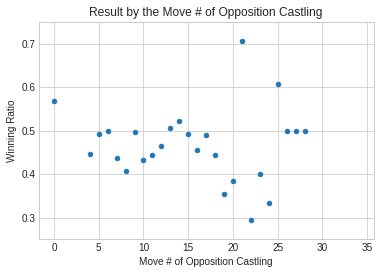

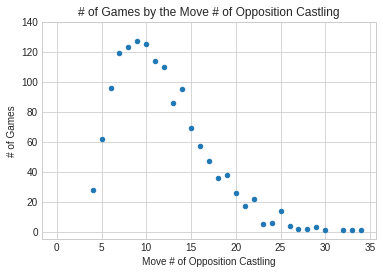

In [35]:
df_mean_by_opp_castled_on = df.groupby('opp_castled_on').mean()
df_mean_by_opp_castled_on.reset_index(inplace=True)
df_mean_by_opp_castled_on.plot.scatter(x='opp_castled_on', y='result', ylim=(0.25, 0.75),
                                       title='Result by the Move # of Opposition Castling')
plt.ylabel('Winning Ratio')
plt.xlabel('Move # of Opposition Castling')
df_count_by_opp_castled_on = df.groupby('opp_castled_on').count()
df_count_by_opp_castled_on.reset_index(inplace=True)
df_count_by_opp_castled_on.plot.scatter(x='opp_castled_on', y='result', legend=False, ylim=(-5, 140),
                                        title='# of Games by the Move # of Opposition Castling')
plt.ylabel('# of Games')
plt.xlabel('Move # of Opposition Castling')
plt.show()

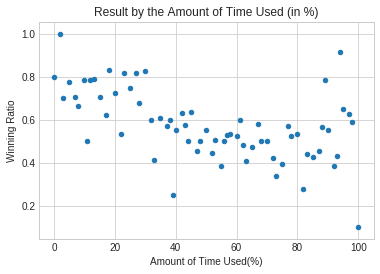

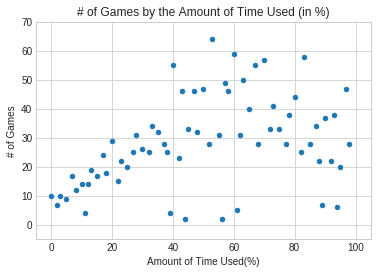

In [39]:
df_mean_by_time_used = df.groupby('time_used').mean()
df_mean_by_time_used.reset_index(inplace=True)
df_mean_by_time_used.plot.scatter(x='time_used', y='result', marker='o',
                                  title='Result by the Amount of Time Used (in %)')
plt.ylabel('Winning Ratio')
plt.xlabel('Amount of Time Used(%)')
df_count_by_time_used = df.groupby('time_used').count()
df_count_by_time_used.reset_index(inplace=True)
df_count_by_time_used.plot.scatter(x='time_used', y='result', legend=False,
                                   title='# of Games by the Amount of Time Used (in %)')
plt.ylim((-5, 70))
plt.ylabel('# of Games')
plt.xlabel('Amount of Time Used(%)')
plt.show()

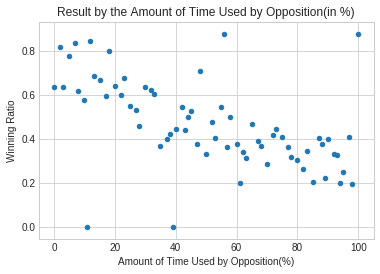

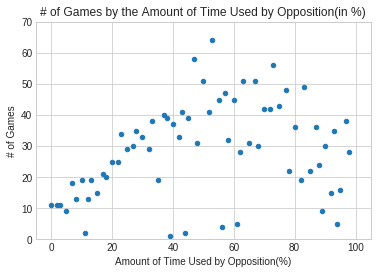

In [56]:
df_mean_by_opp_time_used = df.groupby('opp_time_used').mean()
df_mean_by_opp_time_used.reset_index(inplace=True)
df_mean_by_opp_time_used.plot.scatter(x='opp_time_used', y='result',
                                      title='Result by the Amount of Time Used by Opposition(in %)')
plt.ylabel('Winning Ratio')
plt.xlabel('Amount of Time Used by Opposition(%)')
df_count_by_opp_time_used = df.groupby('opp_time_used').count()
df_count_by_opp_time_used.reset_index(inplace=True)
df_count_by_opp_time_used.plot.scatter(x='opp_time_used', y='result', legend=False,
                                       title='# of Games by the Amount of Time Used by Opposition(in %)')
plt.ylim((0, 70))
plt.ylabel('# of Games')
plt.xlabel('Amount of Time Used by Opposition(%)')
plt.show()